## Categorization of Amazon Reviews




In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt

from tensorflow.keras.layers import SpatialDropout1D, Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer

from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/CSV/processed_reviews_split_RESIT_minimal.csv"
data_frame=pd.read_csv(path)

Mounted at /content/drive


In [2]:
data_frame = pd.read_csv("/content/drive/MyDrive/CSV/processed_reviews_split_RESIT_minimal.csv")
data_frame.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,OMG this is sooo good.. Very Good!!!,True,5.0,prime_pantry
1,product_review_000001,This soap smells pretty good and it seems to w...,True,4.0,prime_pantry
2,product_review_000002,Don't seem to dissolve after quite some time. ...,False,1.0,prime_pantry
3,product_review_000003,these zip bags do as they should. very good. I...,True,5.0,prime_pantry
4,product_review_000004,What. A. Mess.\nI recommend making this in a m...,True,2.0,prime_pantry


In [3]:
product_score_count_df = data_frame.filter(['text','review_score'])
product_score_count_df = product_score_count_df.dropna()
product_score_count_df = product_score_count_df.astype({'text':'string'})
product_score_count_df.head()

,text,review_score
0,OMG this is sooo good.. Very Good!!!,5.0
1,This soap smells pretty good and it seems to w...,4.0
2,Don't seem to dissolve after quite some time. ...,1.0
3,these zip bags do as they should. very good. I...,5.0
4,What. A. Mess. I recommend making this in a mu...,2.0


In [4]:
product_category_df = data_frame.filter(['text','product_category'])
product_category_df = product_category_df.dropna()
product_category_df = product_category_df.astype({'text':'string'})
product_category_df.head()

,text,product_category
0,OMG this is sooo good.. Very Good!!!,prime_pantry
1,This soap smells pretty good and it seems to w...,prime_pantry
2,Don't seem to dissolve after quite some time. ...,prime_pantry
3,these zip bags do as they should. very good. I...,prime_pantry
4,What. A. Mess. I recommend making this in a mu...,prime_pantry


In [5]:
print(product_score_count_df.columns)
print(product_score_count_df.shape)

Index(['text', 'review_score'], dtype='object')
(28132, 2)


In [6]:
print(product_category_df.columns)
print(product_category_df.shape)

Index(['text', 'product_category'], dtype='object')
(27357, 2)


In [7]:
product_score_count_df["review_score"].value_counts()

 5.0    18399
 4.0     4827
 3.0     2381
 2.0      969
 1.0      780
-1.0      776
Name: review_score, dtype: int64

In [8]:
product_category_df["product_category"].value_counts()

prime_pantry     22100
luxury_beauty     5257
Name: product_category, dtype: int64

In [9]:
review_score = product_score_count_df.review_score.factorize()
review_score

(array([0, 1, 2, ..., 0, 0, 0]),
 Float64Index([5.0, 4.0, 1.0, 2.0, 3.0, -1.0], dtype='float64'))

In [10]:
product_category = product_category_df.product_category.factorize()
product_category

(array([0, 0, 0, ..., 0, 1, 1]),
 Index(['prime_pantry', 'luxury_beauty'], dtype='object'))

In [11]:
product_score_count_review = product_score_count_df.text.values
product_score_count_tokenizer = Tokenizer(num_words=5000)
product_score_count_tokenizer.fit_on_texts(product_score_count_review)
product_score_count_size_of_vocabulary = len(product_score_count_tokenizer.word_index) + 1
product_score_count_encoded_docs = product_score_count_tokenizer.texts_to_sequences(product_score_count_review)
product_score_count_padded_sequence = pad_sequences(product_score_count_encoded_docs, maxlen=200)

In [12]:
product_category_review = product_category_df.text.values
product_category_tokenizer = Tokenizer(num_words=5000)
product_category_tokenizer.fit_on_texts(product_category_review)
product_category_size_of_vocabulary = len(product_category_tokenizer.word_index) + 1
product_category_encoded_docs = product_category_tokenizer.texts_to_sequences(product_category_review)
product_category_padded_sequence = pad_sequences(product_category_encoded_docs, maxlen=200)

In [13]:
print(product_score_count_tokenizer.word_index)

{'the': 1, 'i': 2, 'and': 3, 'a': 4, 'it': 5, 'to': 6, 'this': 7, 'is': 8, 'my': 9, 'of': 10, 'for': 11, 'in': 12, 'but': 13, 'that': 14, 'not': 15, 'great': 16, 'good': 17, 'with': 18, 'on': 19, 'have': 20, 'you': 21, 'like': 22, 'as': 23, 'are': 24, 'so': 25, 'product': 26, 'love': 27, 'these': 28, 'very': 29, 'skin': 30, 'was': 31, 'they': 32, 'use': 33, 'or': 34, 'just': 35, "it's": 36, 'be': 37, 'one': 38, 'if': 39, 'all': 40, 'me': 41, 'really': 42, 'them': 43, 'at': 44, 'will': 45, 'more': 46, 'when': 47, 'can': 48, 'well': 49, 'has': 50, 'than': 51, 'nice': 52, 'out': 53, 'your': 54, 'too': 55, 'up': 56, 'taste': 57, 'no': 58, 'price': 59, "don't": 60, 'would': 61, 'get': 62, 'from': 63, 'little': 64, 'do': 65, 'used': 66, 'much': 67, 'time': 68, 'flavor': 69, 'hair': 70, 'other': 71, 'does': 72, 'some': 73, 'an': 74, 'after': 75, 'best': 76, 'had': 77, 'using': 78, 'only': 79, 'better': 80, 'also': 81, 'works': 82, 'scent': 83, 'because': 84, 'products': 85, 'about': 86, 'what

In [14]:
print(product_category_tokenizer.word_index)

{'the': 1, 'i': 2, 'and': 3, 'a': 4, 'it': 5, 'to': 6, 'this': 7, 'is': 8, 'my': 9, 'of': 10, 'for': 11, 'in': 12, 'but': 13, 'that': 14, 'not': 15, 'good': 16, 'great': 17, 'with': 18, 'on': 19, 'have': 20, 'like': 21, 'you': 22, 'as': 23, 'are': 24, 'so': 25, 'product': 26, 'love': 27, 'these': 28, 'very': 29, 'skin': 30, 'was': 31, 'they': 32, 'use': 33, 'or': 34, 'just': 35, "it's": 36, 'be': 37, 'one': 38, 'if': 39, 'all': 40, 'me': 41, 'really': 42, 'them': 43, 'at': 44, 'will': 45, 'more': 46, 'can': 47, 'when': 48, 'well': 49, 'has': 50, 'than': 51, 'nice': 52, 'out': 53, 'your': 54, 'too': 55, 'up': 56, 'taste': 57, 'no': 58, 'price': 59, "don't": 60, 'would': 61, 'get': 62, 'from': 63, 'little': 64, 'do': 65, 'used': 66, 'much': 67, 'time': 68, 'flavor': 69, 'hair': 70, 'other': 71, 'does': 72, 'some': 73, 'an': 74, 'after': 75, 'best': 76, 'had': 77, 'using': 78, 'also': 79, 'better': 80, 'only': 81, 'works': 82, 'scent': 83, 'because': 84, 'products': 85, 'about': 86, 'what

In [15]:
print(product_score_count_review[0])
print(product_score_count_encoded_docs[0])

OMG this is sooo good.. Very Good!!!
[2738, 7, 8, 3043, 17, 29, 17]


In [16]:
print(product_category_review[0])
print(product_category_encoded_docs[0])

OMG this is sooo good.. Very Good!!!
[2687, 7, 8, 3126, 16, 29, 16]


In [17]:
print(product_score_count_padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2738    7    8
 3043 

In [18]:
print(product_category_padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2687    7    8
 3126 

In [19]:
ev_len = 32
product_score_count_model = Sequential() 
product_score_count_model.add(Embedding(product_score_count_size_of_vocabulary, ev_len, input_length=200) )
product_score_count_model.add(SpatialDropout1D(0.25))
product_score_count_model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
product_score_count_model.add(Dropout(0.2))
product_score_count_model.add(Dense(1, activation='sigmoid')) 
product_score_count_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(product_score_count_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           711136    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 727,787
Trainable params: 727,787
Non-trainable params: 0
__________________________________________________

In [20]:
ev_len = 32
product_category_model = Sequential() 
product_category_model.add(Embedding(product_category_size_of_vocabulary, ev_len, input_length=200) )
product_category_model.add(SpatialDropout1D(0.25))
product_category_model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
product_category_model.add(Dropout(0.2))
product_category_model.add(Dense(1, activation='sigmoid')) 
product_category_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(product_category_model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           711136    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 727,787
Trainable params: 727,787
Non-trainable params: 0
________________________________________________

In [21]:
product_score_count_history = product_score_count_model.fit(product_score_count_padded_sequence,review_score[0],validation_split=0.2, epochs=10, batch_size=50)

Epoch 1/10
451/451 [==============================] - 138s 298ms/step - loss: 0.4131 - accuracy: 0.3411 - val_loss: 1.4056 - val_accuracy: 0.1699
Epoch 2/10
451/451 [==============================] - 128s 285ms/step - loss: -1.4521 - accuracy: 0.4267 - val_loss: -4.1215 - val_accuracy: 0.5721
Epoch 3/10
451/451 [==============================] - 127s 282ms/step - loss: -6.9869 - accuracy: 0.5609 - val_loss: -8.5758 - val_accuracy: 0.5157
Epoch 4/10
451/451 [==============================] - 144s 319ms/step - loss: -12.8645 - accuracy: 0.5559 - val_loss: -14.0758 - val_accuracy: 0.5259
Epoch 5/10
451/451 [==============================] - 153s 338ms/step - loss: -19.9485 - accuracy: 0.5569 - val_loss: -20.5784 - val_accuracy: 0.5303
Epoch 6/10
451/451 [==============================] - 128s 284ms/step - loss: -26.0030 - accuracy: 0.5463 - val_loss: -26.3245 - val_accuracy: 0.5712
Epoch 7/10
451/451 [==============================] - 128s 283ms/step - loss: -31.2108 - accuracy: 0.5372 - 

In [22]:
product_category_history = product_category_model.fit(product_category_padded_sequence,product_category[0],validation_split=0.2, epochs=10, batch_size=50)

Epoch 1/10
438/438 [==============================] - 128s 285ms/step - loss: 0.2539 - accuracy: 0.9041 - val_loss: 0.1581 - val_accuracy: 0.9444
Epoch 2/10
438/438 [==============================] - 124s 284ms/step - loss: 0.1474 - accuracy: 0.9488 - val_loss: 0.1454 - val_accuracy: 0.9485
Epoch 3/10
438/438 [==============================] - 124s 284ms/step - loss: 0.1296 - accuracy: 0.9559 - val_loss: 0.1490 - val_accuracy: 0.9452
Epoch 4/10
438/438 [==============================] - 124s 283ms/step - loss: 0.1137 - accuracy: 0.9607 - val_loss: 0.1426 - val_accuracy: 0.9512
Epoch 5/10
438/438 [==============================] - 126s 287ms/step - loss: 0.1055 - accuracy: 0.9643 - val_loss: 0.1522 - val_accuracy: 0.9514
Epoch 6/10
438/438 [==============================] - 125s 285ms/step - loss: 0.1017 - accuracy: 0.9659 - val_loss: 0.1913 - val_accuracy: 0.9481
Epoch 7/10
438/438 [==============================] - 129s 294ms/step - loss: 0.0905 - accuracy: 0.9698 - val_loss: 0.1480 -

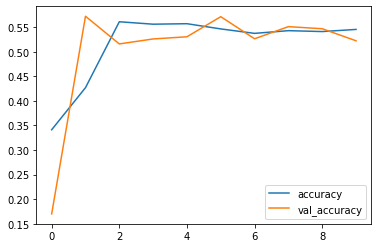

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(product_score_count_history.history['accuracy'], label='accuracy')
plt.plot(product_score_count_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.savefig("Plot_of_product_score_count_history_accuracy.jpg")

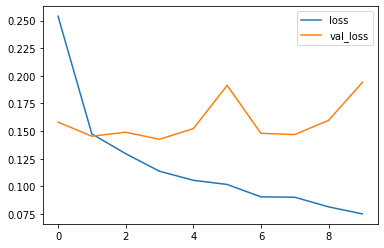

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(product_category_history.history['loss'], label='loss')
plt.plot(product_category_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Plot_of_product_category_history_loss.jpg")

In [25]:
def product_score_count_predict(text):
    product_score_count_rv = product_score_count_tokenizer.texts_to_sequences([text])
    product_score_count_rv = pad_sequences(product_score_count_rv,maxlen=200)
    product_score_count_prediction = int(product_score_count_model.predict(product_score_count_rv).round().item())
    print("Stars Prediction: ", review_score[1][product_score_count_prediction])

In [26]:
def product_category_predict(text):
    product_category_rv = product_category_tokenizer.texts_to_sequences([text])
    product_category_rv = pad_sequences(product_category_rv,maxlen=200)
    product_category_prediction = int(product_category_model.predict(product_category_rv).round().item())
    print("Category Prediction: ", product_category[1][product_category_prediction])

In [27]:
product_score_count_review = "Top of line, best quality"
product_score_count_predict(product_score_count_review)

Stars Prediction:  5.0


In [28]:
product_category_review = "Been looking for this Leisir for a while."
product_category_predict(product_category_review)

Category Prediction:  prime_pantry


In [44]:
from google.colab import files

data_frame.to_csv('processed_reviews_split_RESIT_minimal.csv', encoding = 'utf-8-sig') 
files.download('processed_reviews_split_RESIT_minimal.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>